### import the required labels

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### set the styles for better looking plots

In [35]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

### Load the dataset 

In [36]:
tips = sns.load_dataset("tips")

### displayu the first few rows

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### displayu the last few rows

In [38]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Tips dataset information

In [39]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Tips data set statistical summary

In [40]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### show the missing values

In [41]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### visualization and Analysis

### 1. Distribution of Total Bills

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


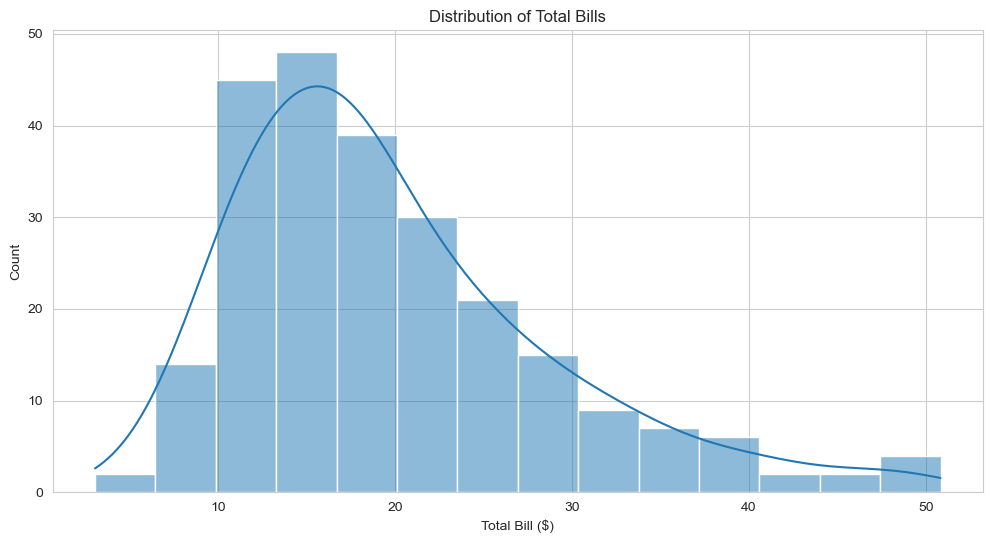

In [42]:
plt.figure(figsize= (12,6))
sns.histplot(data = tips , x = "total_bill", kde = True)
plt.title("Distribution of Total Bills")
plt.xlabel('Total Bill ($)')
plt.ylabel('Count')
plt.savefig('total_bill_distribution.png')
plt.show()

In [43]:
# Additional insights: skweness and kurtosis
print(f"skweness: {tips['total_bill'].skew():.2f}")
print(f"kurtosis: {tips['total_bill'].kurtosis():.2f}")

skweness: 1.13
kurtosis: 1.22


### Insights and observations
- The histogram shows the distribution of total bills 
- the distribution appears to be right-skewed, indicating that there are some higher bill that pull the mean to the right
- The positive skeweness value confirms this observation
- The kurtosis  value tells us about the tall behaviour of the distribution

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


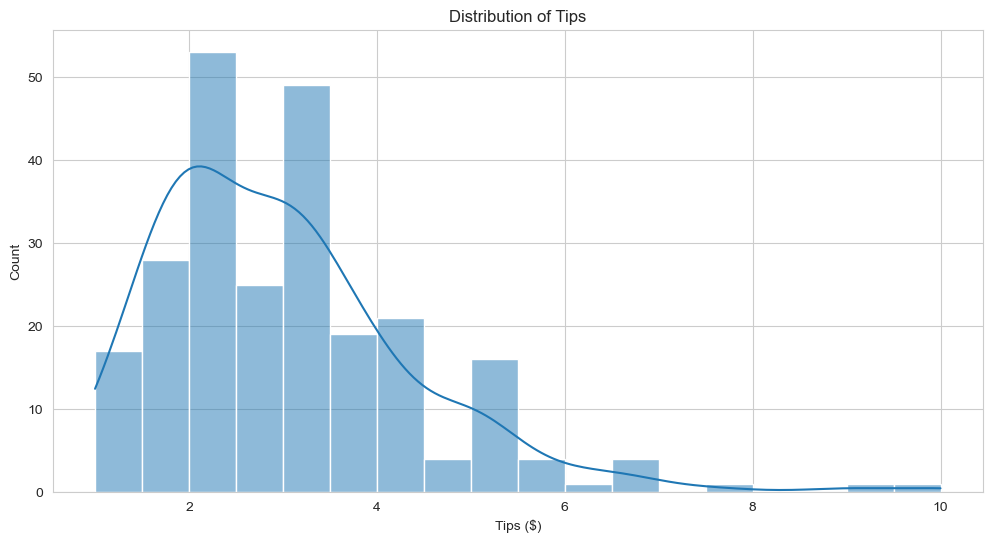

In [44]:
plt.figure(figsize= (12,6))
sns.histplot(data = tips , x = "tip", kde = True)
plt.title("Distribution of Tips")
plt.xlabel('Tips ($)')
plt.ylabel('Count')
plt.savefig('tips_distribution.png')
plt.show()

In [45]:
# Additional insights: skweness and kurtosis
print(f"skweness: {tips['tip'].skew():.2f}")
print(f"kurtosis: {tips['tip'].kurtosis():.2f}")

skweness: 1.47
kurtosis: 3.65


### Insighs and Observation
- simalar to the total bill, the distribution of tips is also right-skewed
- This suggests that while most tips fall within a certain range, there are occasioanl larger tips that skew the distribution

### 3. Relationship between total bills and tips

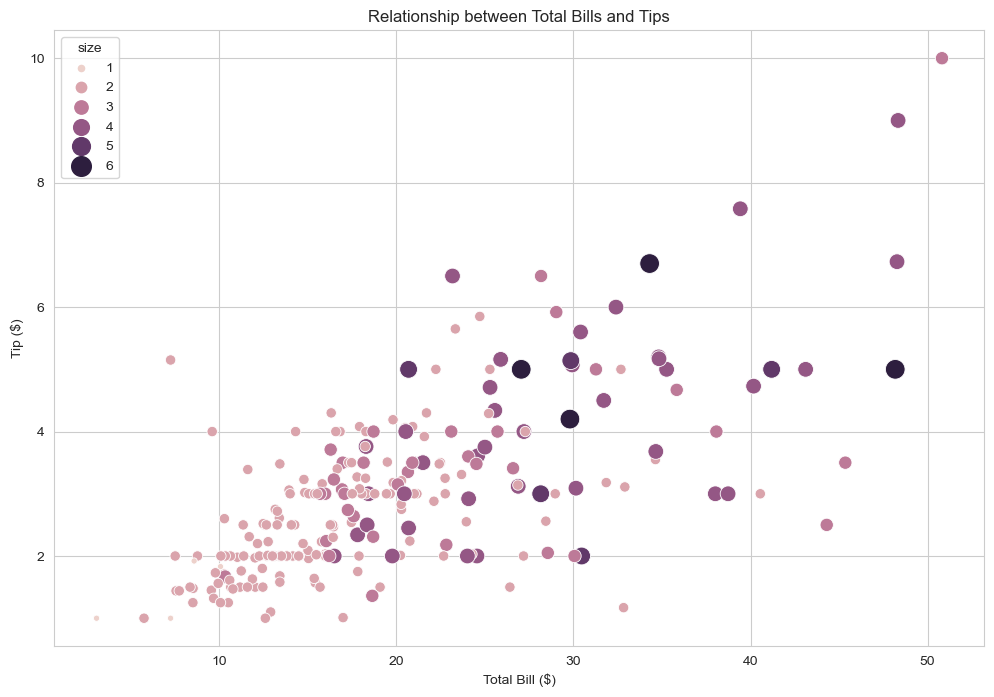

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=tips, x='total_bill', y = 'tip', hue= 'size' , size = 'size' , sizes=(20,200))
plt.title('Relationship between Total Bills and Tips')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.savefig('rel_between_total_bill_and_tip.png')
plt.show()
           

In [51]:
# Calculate the correlation
correlation = tips['total_bill'].corr(tips['tip'])
print(f"Correlation between Total bill  amd Tip: {correlation:.2f}")

Correlation between Total bill  amd Tip: 0.68


###  Insights and Observation
- The scatterplot reveals that there is a positive correlation between the total bill and tip amount
- The color and size of the points represent the party size, showing that the larger points tend to have higher bills and tips
- The correlation coefficient confirms the strong positive relationship

###  4. Avarage Tips by Day and Time

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


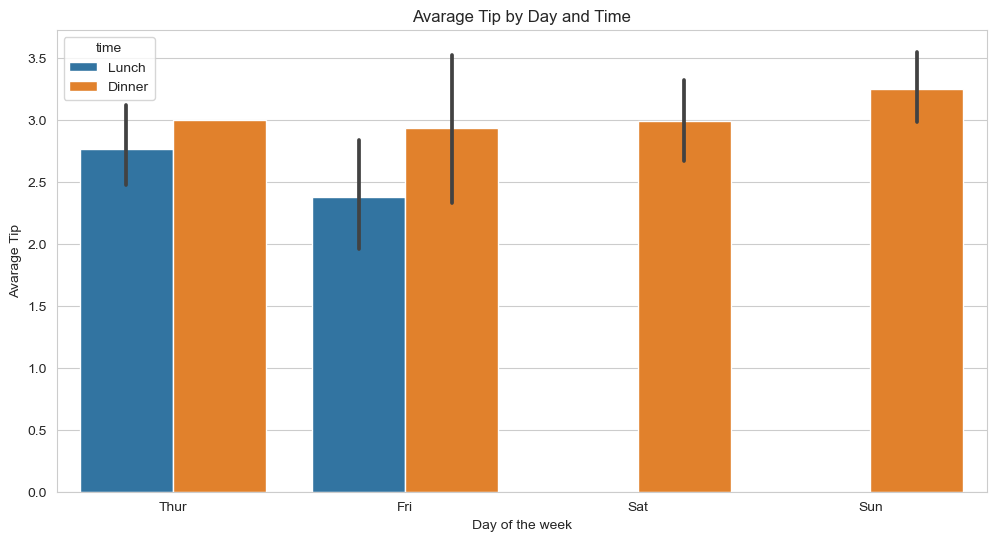

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data= tips, x='day', y='tip', hue='time')
plt.title('Avarage Tip by Day and Time')
plt.xlabel('Day of the week')
plt.ylabel('Avarage Tip')
plt.savefig('Avarage_tip_by_day_time.png')
plt.show()

### Insights and Observations

This bar plot show the avarage tip amount for each day of the week, split by time (lunch vs dinner).

we can also observe that:
- Dinner tip have generally higher tips that lunch tips
- saturday and sunday have higher avarage tips, possibly due to weekend dining habits

### 5. Tips percentage per gender and smoker status


tips['tip_percentage'] = tips['tip'] / tips['total_bill'] * 100

plt.figure(figsize = (12,6))
sns.boxplot(data=tips, x='sex', y='tip_percentage', hue='smoker')
plt.title('Tip Percentage by Gender and Smoker Status')
plt.xlabel('Gender')
plt.ylabel('Tip_percentage')
plt.savefig('tip_percentage_by_gender_and_smoker_status.png')
plt.show()


### Insights and Observation

The boxplot revelas the distribution of tip percentage across gender (sex) and smoker status.
- the median tip percentage is similar across all groups
- The's more variabliability in tips percentage for female smokers
- Female non-smokers have a hightly higher median tip percentage


###  6. Total Bill Distribution by Day

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


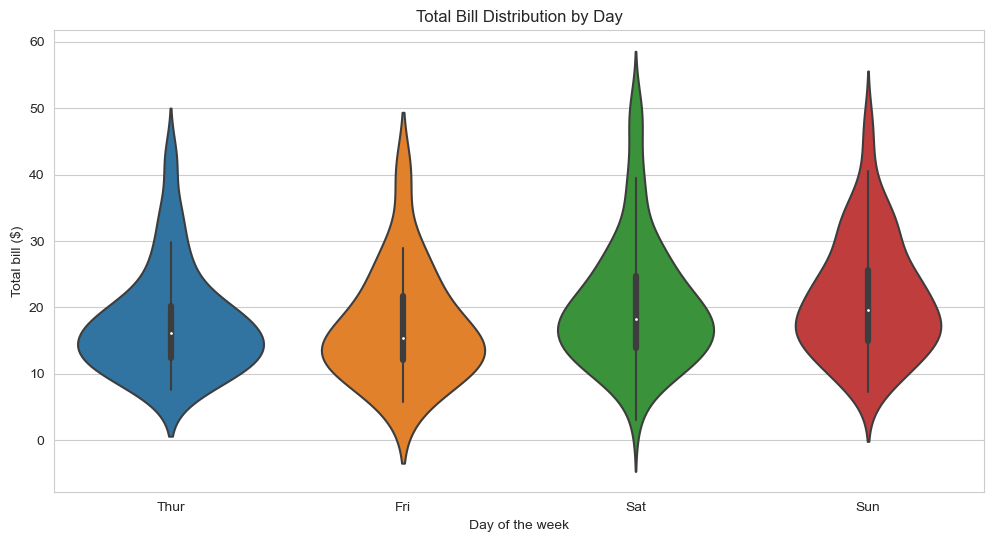

In [58]:
plt.figure(figsize=(12,6))
sns.violinplot(data=tips, x='day', y='total_bill')
plt.title('Total Bill Distribution by Day')
plt.xlabel('Day of the week')
plt.ylabel('Total bill ($)')
plt.savefig('Total_bill_by_day.png')
plt.show()

### Insights and Observations
- This Violin plot show the distribution of total bills  of each day of the week

 we can see that:

 -Saturday and sundays have a wider range of total bills
 - Thursday have a more concentrated distribution of total bills
                                                       
                                                    

### 7. Correlation Heatmap

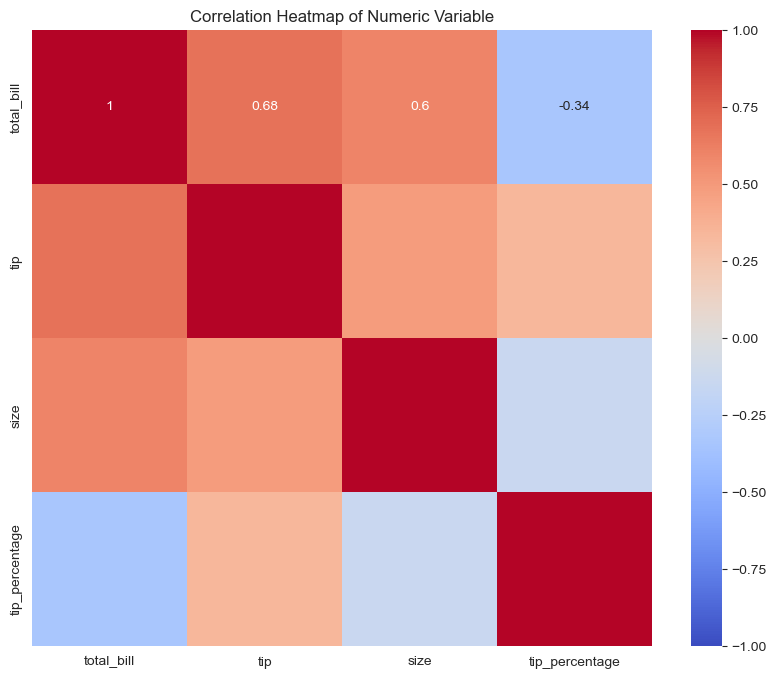

In [64]:
numeric_tips = tips.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_tips.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variable')
plt.savefig('correlation_heatmap_of_numeric_values_in_tips_dataset.png')
plt.show()


### Insights and observation
The heatmap visulizes the correlation between variables

Key observation are:
- Strong positive correlation between total bills and tip
- moderate positive correlation between party size and both tips and total bill

### 8. Tip percentage distribution by time and Day

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is depre

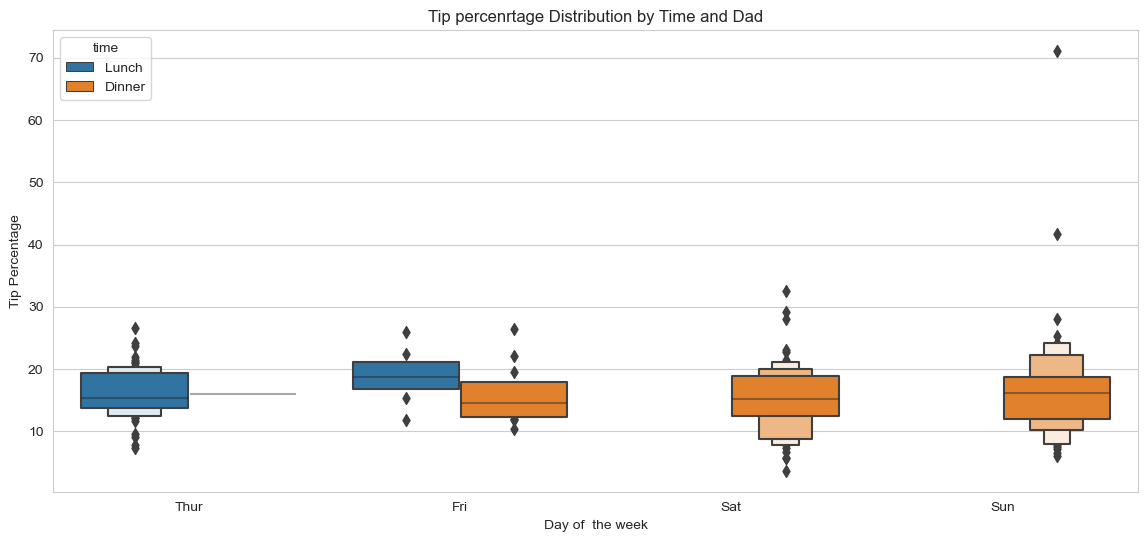

In [65]:
plt.figure(figsize=(14,6))
sns.boxenplot(data =tips , x='day', y='tip_percentage', hue='time')
plt.title('Tip percenrtage Distribution by Time and Dad')
plt.xlabel('Day of  the week')
plt.ylabel('Tip Percentage')
plt.savefig('tip_percentage_distribution_by_time_and_day_boxenplot.png')
plt.show()

### Insights and Observation

The enhance boxplot (boxenplot) provide a more  detailed view of the tip percentage distribution across day and times.

we can observe that:
- Dinner tip percentage tend to be slighter higher and more variable than lunch tip percentage
- sunday sho the higher median tip percentage per both lunch and dinner

### 9. Relationship between party size and Total Bill

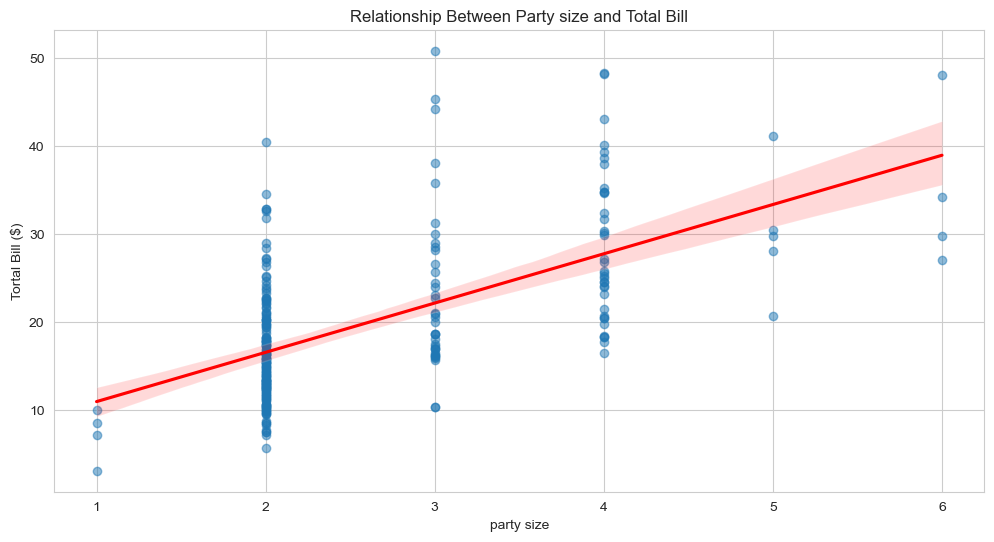

In [68]:
plt.figure(figsize=(12,6))
sns.regplot(data=tips, x='size', y='total_bill', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relationship Between Party size and Total Bill')
plt.xlabel('party size')
plt.ylabel('Tortal Bill ($)')
plt.savefig('Relationship_between_party_size_and_total_bill')
plt.show()

In [69]:
# Calculate the correlation
correlation = tips['size'].corr(tips['total_bill'])
print(f"Correlation between Total Size and Total Bill: {correlation:.2f}")

Correlation between Total Size and Total Bill: 0.60


### Insights and observation
The regression plot show the relationship between party size and total bill
- The postive trend indicates that larger parties tend to have higher bills , which is expected
- The correlation coefficient confirms the moerate positive relationship

### 10. pairplot for key variable

C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

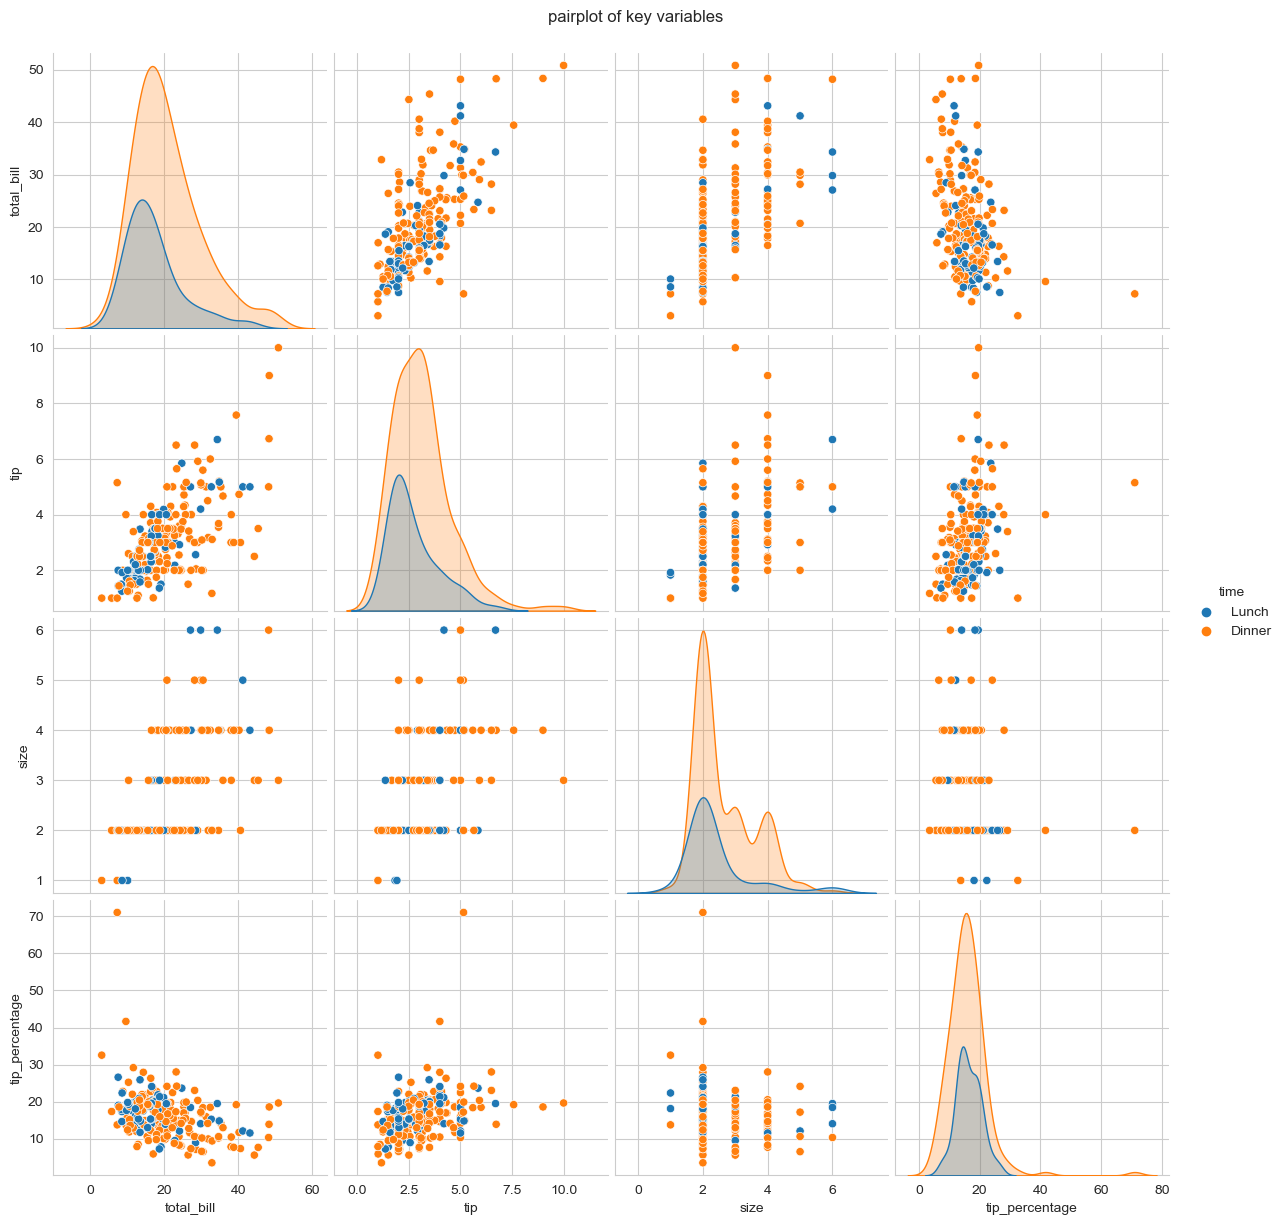

In [73]:
sns.pairplot(tips, vars=['total_bill', 'tip', 'size', 'tip_percentage'], hue='time', height=3)
plt.suptitle('pairplot of key variables', y=1.02)
plt.savefig('pairplot_of_key_variables.png')
plt.show()

### Insights and observation
This pairplot provides a comprehensive view of relationship between key variables, colored by time (lunch vs dinner)

it allows us to see multiple relationship at once and identify any pattern of cluster
